In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# load facial key points data
keyfacial_df = pd.read_csv('data.csv')

In [3]:
keyfacial_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
# Obtain relavant information about the dataframe
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
# Check if null values exist in the dataframe
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [6]:
keyfacial_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [7]:
keyfacial_df['Image'].shape

(2140,)

In [8]:
# Since values for the image are given as space separated string, separate the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96, 96)
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [9]:
# Obtain the Shape of the image
keyfacial_df['Image'][0].shape

(96, 96)

# PERFORMING IMAGE VISUALIZATION

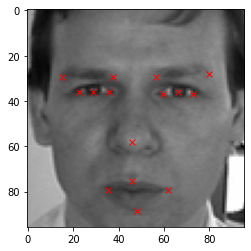

In [10]:
# Plotting a random image from the dataset along with facial keypoints. 
# Image data is obtained from df['Image'] and plotted using plt.imshow
# 15 x and y coordinates for the corresponding image
# since x-coordinates are in even columns like 0,2,4,.. and y-coordinates are in odd columns like 1,3,5,..

i = 1000
plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

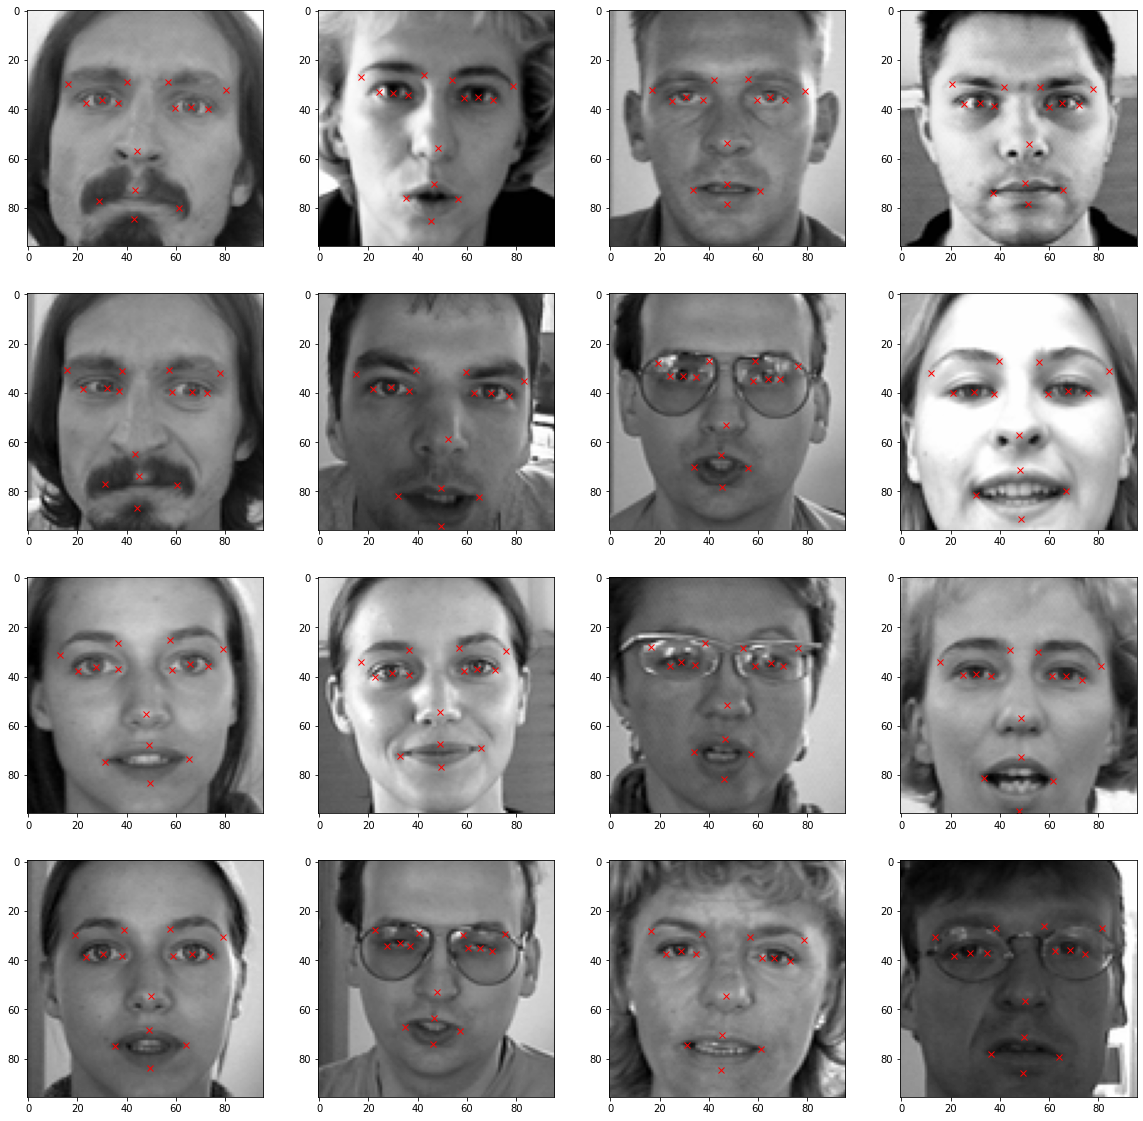

In [11]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)    
    image = plt.imshow(keyfacial_df['Image'][i],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

# PERFORMING IMAGE AUGMENTATION

In [12]:
# Create a new copy of the dataframe
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [13]:
# Obtain the columns in the dataframe

columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [14]:
# Horizontal Flip - flip the images along y axis
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

# since we are flipping horizontally, y coordinate values would be the same
# Only x coordiante values would change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 0: # all the x-coordinates are located in even numbered column
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

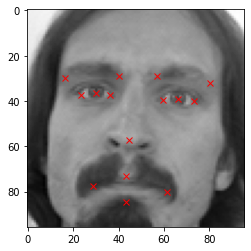

In [15]:
# Let's see if that worked
# Show the Original image
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

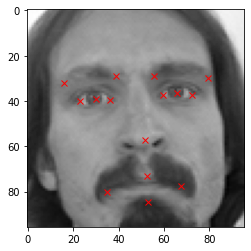

In [16]:
# Show the Horizontally flipped image
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')
# Yes it did!

In [17]:
# Concatenate the original dataframe with the augmented dataframe
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))

In [18]:
augmented_df.shape
# Now we have doubled the number of samples available to us

(4280, 31)

In [19]:
# Randomingly increasing the brightness of the images
# We multiply pixel values by random values between 1.5 and 2 to increase the brightness of the image
# we clip the value between 0 and 255

import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(6420, 31)

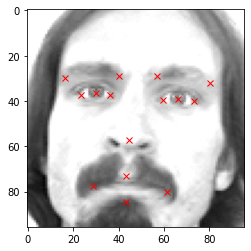

In [20]:
# That's how our images with increased brightness look like
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [21]:
keyfacial_df_copy = copy.copy(keyfacial_df)
# Vertical Flip - flip the images along x axis
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

for i in range(len(columns)):
  if i%2 == 1: # all the y-coordinates are located in odd numbered column
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

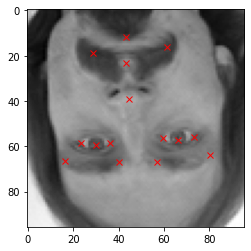

In [22]:
# Vertically flipped Image
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [23]:
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))

In [24]:
augmented_df.shape
# We have now quadroupled the original number of samples available to us with different variations
# so that our model can generalise better

(8560, 31)

# PERFORMING DATA NORMALIZATION & TRAINING DATA PREPARATION

In [25]:
# Obtain the value of images which is present in the last column
img = augmented_df[:,30]

# Normalize the images
img = img/255.

# Create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the img list and add image values to the empty array after expanding it's dimension from (96, 96) to (96, 96, 1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(8560, 96, 96, 1)

In [26]:
# Obtain the value of x & y coordinates which are to used as target.
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

In [27]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
X_train.shape # 6848 samples for training

(6848, 96, 96, 1)

In [29]:
y_test.shape # 1712 samples for testing

(1712, 30)

# BUILDING DEEP RESIDUAL NEURAL NETWORK THAT DETECTS KEY FACIAL POINTS

In [30]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [31]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_facialKeyPoints.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [32]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

In [33]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [34]:
history = model_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 300, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/300
204/204 [==============================] - ETA: 0s - loss: 268.0761 - accuracy: 0.5016
Epoch 00001: val_loss improved from inf to 706.33722, saving model to FacialKeyPoints_weights.hdf5
204/204 [==============================] - 10s 47ms/step - loss: 268.0761 - accuracy: 0.5016 - val_loss: 706.3372 - val_accuracy: 0.3644
Epoch 2/300
203/204 [============================>.] - ETA: 0s - loss: 82.0845 - accuracy: 0.6857
Epoch 00002: val_loss improved from 706.33722 to 246.14381, saving model to FacialKeyPoints_weights.hdf5
204/204 [==============================] - 8s 38ms/step - loss: 82.0483 - accuracy: 0.6858 - val_loss: 246.1438 - val_accuracy: 0.6122
Epoch 3/300
203/204 [============================>.] - ETA: 0s - loss: 51.6972 - accuracy: 0.6735
Epoch 00003: val_loss improved from 246.14381 to 93.16039, saving model to FacialKeyPoints_weights.hdf5
204/204 [==============================] - 8s 39ms/step - loss: 51.7933 - accuracy: 0.6733 - val_loss: 93.1604 - val_accuracy

Epoch 57/300
203/204 [============================>.] - ETA: 0s - loss: 8.2339 - accuracy: 0.8065
Epoch 00057: val_loss did not improve from 41.95094
204/204 [==============================] - 7s 35ms/step - loss: 8.2281 - accuracy: 0.8066 - val_loss: 51.3376 - val_accuracy: 0.8017
Epoch 58/300
203/204 [============================>.] - ETA: 0s - loss: 6.8214 - accuracy: 0.8133
Epoch 00058: val_loss did not improve from 41.95094
204/204 [==============================] - 7s 35ms/step - loss: 6.8184 - accuracy: 0.8132 - val_loss: 46.5033 - val_accuracy: 0.8222
Epoch 59/300
203/204 [============================>.] - ETA: 0s - loss: 5.7563 - accuracy: 0.8133
Epoch 00059: val_loss did not improve from 41.95094
204/204 [==============================] - 7s 35ms/step - loss: 5.7609 - accuracy: 0.8134 - val_loss: 58.3694 - val_accuracy: 0.8192
Epoch 60/300
203/204 [============================>.] - ETA: 0s - loss: 6.1357 - accuracy: 0.8125
Epoch 00060: val_loss did not improve from 41.95094
2

Epoch 86/300
203/204 [============================>.] - ETA: 0s - loss: 6.3489 - accuracy: 0.8262
Epoch 00086: val_loss did not improve from 37.26849
204/204 [==============================] - 7s 35ms/step - loss: 6.3461 - accuracy: 0.8264 - val_loss: 42.9714 - val_accuracy: 0.8280
Epoch 87/300
203/204 [============================>.] - ETA: 0s - loss: 4.7281 - accuracy: 0.8234
Epoch 00087: val_loss did not improve from 37.26849
204/204 [==============================] - 7s 35ms/step - loss: 4.7269 - accuracy: 0.8235 - val_loss: 39.1729 - val_accuracy: 0.8338
Epoch 88/300
203/204 [============================>.] - ETA: 0s - loss: 5.6464 - accuracy: 0.8260
Epoch 00088: val_loss did not improve from 37.26849
204/204 [==============================] - 7s 35ms/step - loss: 5.6466 - accuracy: 0.8260 - val_loss: 48.8737 - val_accuracy: 0.8047
Epoch 89/300
203/204 [============================>.] - ETA: 0s - loss: 4.9047 - accuracy: 0.8314
Epoch 00089: val_loss did not improve from 37.26849
2

Epoch 115/300
203/204 [============================>.] - ETA: 0s - loss: 5.8311 - accuracy: 0.8273
Epoch 00115: val_loss did not improve from 37.26849
204/204 [==============================] - 7s 35ms/step - loss: 5.8256 - accuracy: 0.8274 - val_loss: 47.1254 - val_accuracy: 0.8309
Epoch 116/300
203/204 [============================>.] - ETA: 0s - loss: 4.6127 - accuracy: 0.8327
Epoch 00116: val_loss did not improve from 37.26849
204/204 [==============================] - 7s 35ms/step - loss: 4.6150 - accuracy: 0.8327 - val_loss: 42.2101 - val_accuracy: 0.8542
Epoch 117/300
203/204 [============================>.] - ETA: 0s - loss: 6.0950 - accuracy: 0.8271
Epoch 00117: val_loss did not improve from 37.26849
204/204 [==============================] - 7s 35ms/step - loss: 6.0923 - accuracy: 0.8272 - val_loss: 48.3883 - val_accuracy: 0.8367
Epoch 118/300
203/204 [============================>.] - ETA: 0s - loss: 4.7052 - accuracy: 0.8365
Epoch 00118: val_loss did not improve from 37.268

Epoch 144/300
203/204 [============================>.] - ETA: 0s - loss: 3.8052 - accuracy: 0.8481
Epoch 00144: val_loss did not improve from 37.26849
204/204 [==============================] - 7s 34ms/step - loss: 3.8042 - accuracy: 0.8481 - val_loss: 43.6975 - val_accuracy: 0.8746
Epoch 145/300
203/204 [============================>.] - ETA: 0s - loss: 3.6065 - accuracy: 0.8553
Epoch 00145: val_loss did not improve from 37.26849
204/204 [==============================] - 7s 34ms/step - loss: 3.6057 - accuracy: 0.8555 - val_loss: 45.4155 - val_accuracy: 0.8542
Epoch 146/300
203/204 [============================>.] - ETA: 0s - loss: 3.4806 - accuracy: 0.8556
Epoch 00146: val_loss did not improve from 37.26849
204/204 [==============================] - 7s 35ms/step - loss: 3.4794 - accuracy: 0.8556 - val_loss: 47.2462 - val_accuracy: 0.8484
Epoch 147/300
203/204 [============================>.] - ETA: 0s - loss: 3.6412 - accuracy: 0.8545
Epoch 00147: val_loss did not improve from 37.268

Epoch 173/300
203/204 [============================>.] - ETA: 0s - loss: 2.9732 - accuracy: 0.8661
Epoch 00173: val_loss did not improve from 37.00047
204/204 [==============================] - 7s 35ms/step - loss: 2.9729 - accuracy: 0.8661 - val_loss: 38.3408 - val_accuracy: 0.8630
Epoch 174/300
203/204 [============================>.] - ETA: 0s - loss: 3.2825 - accuracy: 0.8638
Epoch 00174: val_loss did not improve from 37.00047
204/204 [==============================] - 7s 35ms/step - loss: 3.2832 - accuracy: 0.8638 - val_loss: 42.1121 - val_accuracy: 0.8280
Epoch 175/300
203/204 [============================>.] - ETA: 0s - loss: 9.0279 - accuracy: 0.8391
Epoch 00175: val_loss did not improve from 37.00047
204/204 [==============================] - 7s 35ms/step - loss: 9.0219 - accuracy: 0.8390 - val_loss: 47.5341 - val_accuracy: 0.7813
Epoch 176/300
203/204 [============================>.] - ETA: 0s - loss: 6.1515 - accuracy: 0.8410
Epoch 00176: val_loss did not improve from 37.000

Epoch 230/300
203/204 [============================>.] - ETA: 0s - loss: 3.4373 - accuracy: 0.8716
Epoch 00230: val_loss did not improve from 31.18553
204/204 [==============================] - 7s 35ms/step - loss: 3.4359 - accuracy: 0.8715 - val_loss: 45.5332 - val_accuracy: 0.8484
Epoch 231/300
203/204 [============================>.] - ETA: 0s - loss: 3.1582 - accuracy: 0.8651
Epoch 00231: val_loss did not improve from 31.18553
204/204 [==============================] - 7s 35ms/step - loss: 3.1584 - accuracy: 0.8649 - val_loss: 44.3105 - val_accuracy: 0.8571
Epoch 232/300
203/204 [============================>.] - ETA: 0s - loss: 3.4592 - accuracy: 0.8631
Epoch 00232: val_loss did not improve from 31.18553
204/204 [==============================] - 7s 35ms/step - loss: 3.4581 - accuracy: 0.8632 - val_loss: 49.6188 - val_accuracy: 0.8571
Epoch 233/300
203/204 [============================>.] - ETA: 0s - loss: 3.2474 - accuracy: 0.8676
Epoch 00233: val_loss did not improve from 31.185

Epoch 259/300
203/204 [============================>.] - ETA: 0s - loss: 2.8992 - accuracy: 0.8778
Epoch 00259: val_loss did not improve from 31.18553
204/204 [==============================] - 7s 35ms/step - loss: 2.9004 - accuracy: 0.8776 - val_loss: 37.2748 - val_accuracy: 0.8863
Epoch 260/300
203/204 [============================>.] - ETA: 0s - loss: 2.7362 - accuracy: 0.8792
Epoch 00260: val_loss did not improve from 31.18553
204/204 [==============================] - 7s 35ms/step - loss: 2.7364 - accuracy: 0.8793 - val_loss: 36.0227 - val_accuracy: 0.8717
Epoch 261/300
203/204 [============================>.] - ETA: 0s - loss: 2.5896 - accuracy: 0.8793
Epoch 00261: val_loss did not improve from 31.18553
204/204 [==============================] - 7s 35ms/step - loss: 2.5893 - accuracy: 0.8792 - val_loss: 36.0845 - val_accuracy: 0.8688
Epoch 262/300
203/204 [============================>.] - ETA: 0s - loss: 2.7399 - accuracy: 0.8745
Epoch 00262: val_loss did not improve from 31.185

Epoch 288/300
203/204 [============================>.] - ETA: 0s - loss: 2.5988 - accuracy: 0.8719
Epoch 00288: val_loss did not improve from 31.18553
204/204 [==============================] - 7s 35ms/step - loss: 2.5977 - accuracy: 0.8719 - val_loss: 37.6378 - val_accuracy: 0.8688
Epoch 289/300
203/204 [============================>.] - ETA: 0s - loss: 2.5396 - accuracy: 0.8792
Epoch 00289: val_loss did not improve from 31.18553
204/204 [==============================] - 7s 35ms/step - loss: 2.5386 - accuracy: 0.8792 - val_loss: 37.8430 - val_accuracy: 0.8746
Epoch 290/300
203/204 [============================>.] - ETA: 0s - loss: 2.5440 - accuracy: 0.8847
Epoch 00290: val_loss did not improve from 31.18553
204/204 [==============================] - 7s 35ms/step - loss: 2.5435 - accuracy: 0.8846 - val_loss: 35.8414 - val_accuracy: 0.8688
Epoch 291/300
203/204 [============================>.] - ETA: 0s - loss: 2.5393 - accuracy: 0.8796
Epoch 00291: val_loss did not improve from 31.185

In [35]:
# saving the model architecture to json file for future use

model_json = model_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)

# ASSESSING TRAINED MODEL PERFORMANCE

In [36]:
with open('FacialKeyPoints-model.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_facialKeyPoints.load_weights('FacialKeyPoints_weights.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [37]:
# Evaluate the model

result = model_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

54/54 [==============================] - 1s 14ms/step - loss: 40.9203 - accuracy: 0.8213
Accuracy : 0.8212617039680481


In [38]:
# Get the model keys 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

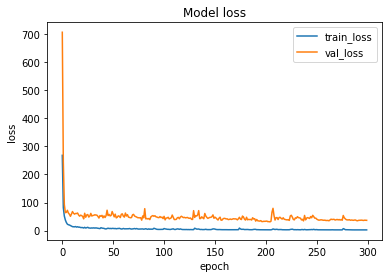

In [39]:
# Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# MAKING PREDICTIONS USING BOTH MODELS

In [50]:
with open('FacialExpression-model.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture 
model_e = tf.keras.models.model_from_json(json_savedModel)
model_e.load_weights('FacialExpression_weights.hdf5')
model_e.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [51]:
# Function that makes predictions using both models
def predict(X_test):

  # Making prediction from the keypoint model
  df_predict = model_facialKeyPoints.predict(X_test)

  # Making prediction from the emotion model
  df_emotion = np.argmax(model_e.predict(X_test), axis=-1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [52]:
df_predict = predict(X_test)

In [53]:
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,66.375221,37.203106,28.562403,37.769817,58.819420,38.010181,74.403534,38.155518,36.234821,38.171703,...,53.146160,63.967060,77.130699,32.109936,77.800606,47.951088,72.118217,48.065758,85.097672,2
1,28.583540,36.603645,66.488541,34.404537,36.991432,37.466747,19.373547,37.748249,57.908268,35.815849,...,59.664982,33.195492,77.616905,66.901367,75.944557,49.550953,74.760757,50.038181,83.443672,2
2,64.347946,58.301254,30.181526,59.683125,57.088039,57.354321,71.947060,57.245193,37.349525,58.265411,...,38.525528,61.465145,21.370949,29.508326,22.271656,45.788074,22.690491,45.507618,17.398788,0
3,67.119064,35.663612,28.669514,36.423260,60.349064,36.711761,73.351067,36.297512,35.025082,36.918591,...,59.769920,60.151447,81.602028,37.332985,82.266670,48.725105,75.948372,48.885853,91.125450,4
4,67.619553,36.185455,29.530231,36.967079,59.570408,37.337624,76.457481,36.696007,37.649178,37.678219,...,59.922726,68.485649,74.993820,30.039246,75.709114,48.779091,72.767136,48.984215,87.863113,3


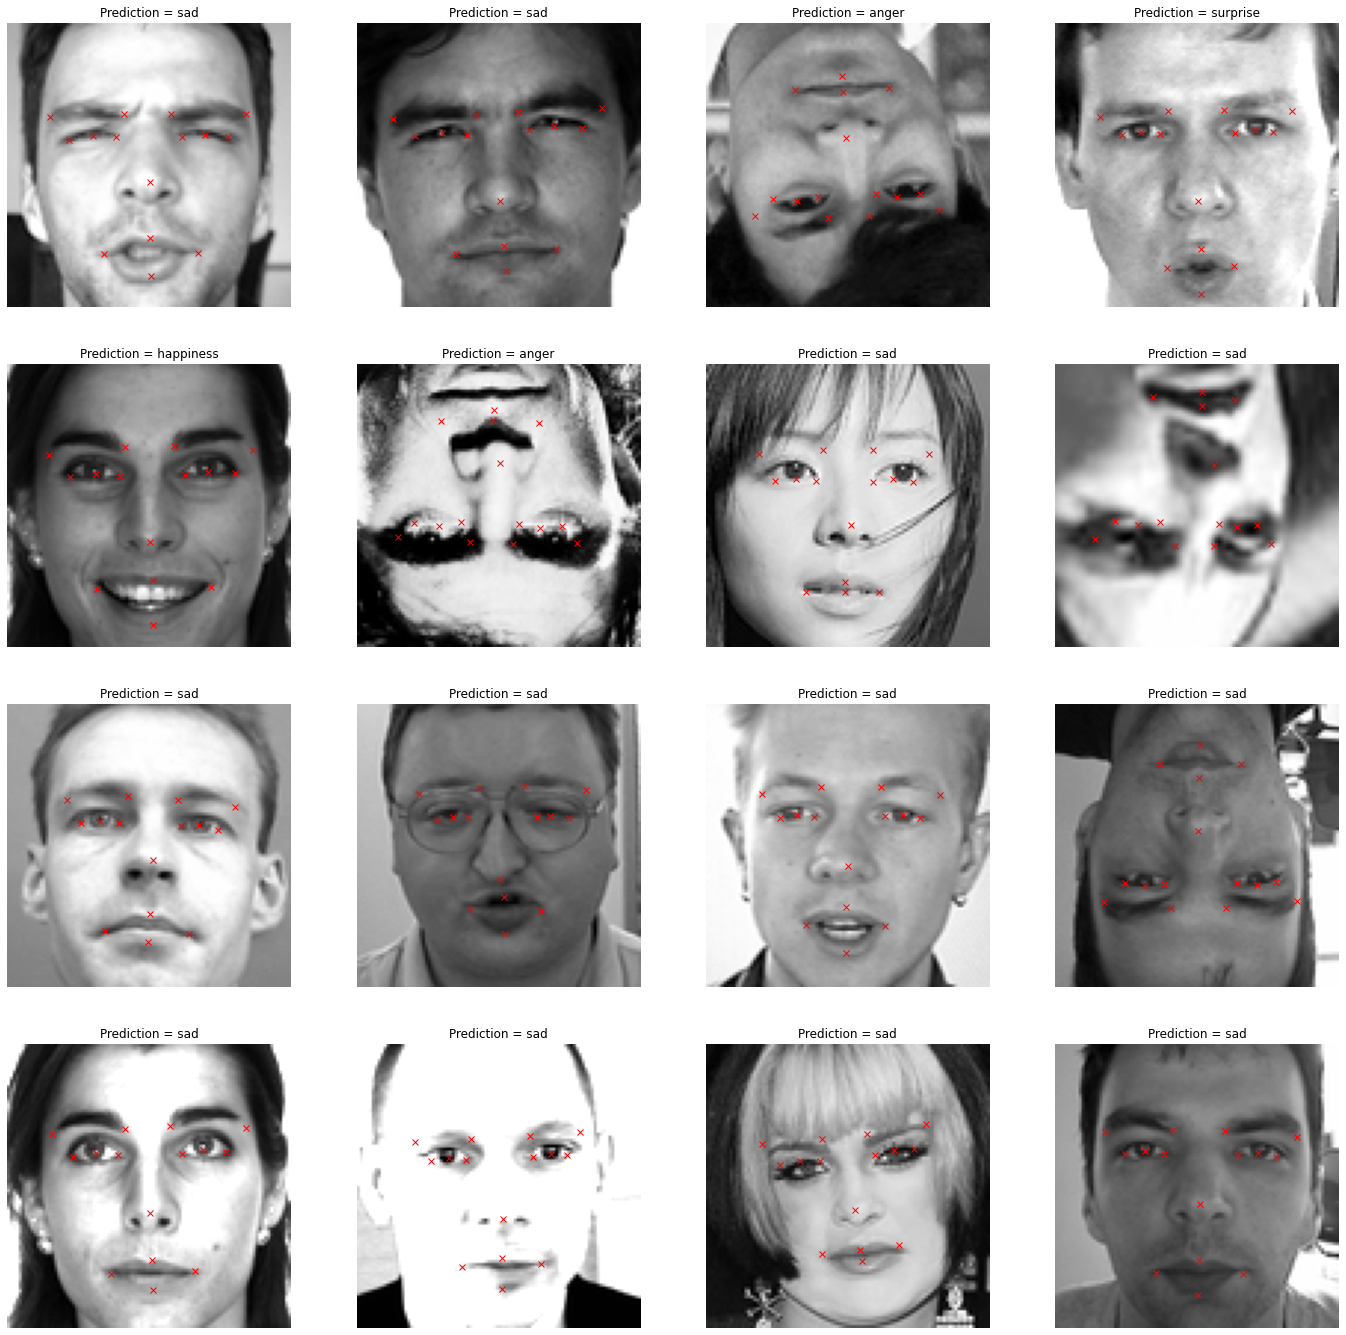

In [57]:
# Plotting the test images and their predicted keypoints and emotions

label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')